# 090.Introduction to Tensorflow 2.0 and Keras

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## version check

In [3]:
print(tf.__version__)

2.0.0


### GPU check

In [5]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14936379308875405254
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3186409472
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16399183070360056769
physical_device_desc: "device: 0, name: Quadro M1200, pci bus id: 0000:01:00.0, compute capability: 5.0"
]


# Introduction to keras

## High Level API 로 간단한 모델 만들기

- 가장 간단한 종류의 모델 : Sequential 모델  


- 층(layer)을 조합하여 모델(model)을 build 


- 가장 흔한 모델 구조는 층을 차례대로 쌓은 tf.keras.Sequential 모델  

In [6]:
from tensorflow.keras.layers import Dense, Activation

# load mnist data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

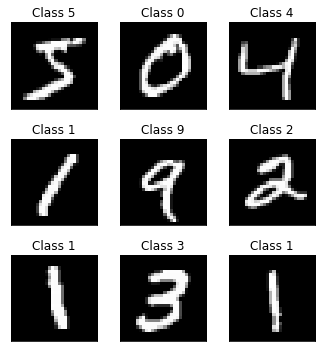

In [7]:
plt.figure(figsize=(5,5))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title("Class {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

plt.show()

### data 전처리
 
- 입력 imaga 의 shape 을 (28, 28) ==> (784,) 로 flatten


- pixel 값을 0 `~` 1 사이로 scaling


- label 을 one-hot-encoding

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]  
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]  
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]  
etc.
```

In [8]:
X_train = X_train.reshape(-1, 784).astype("float32")
X_test  = X_test.reshape(-1, 784).astype("float32")

X_train /= 255.
X_test /= 255.

Y_train = tf.keras.utils.to_categorical(y_train)
Y_test = tf.keras.utils.to_categorical(y_test)

### 간단한 완전 연결(fully-connected) 네트워크(즉, 다층 퍼셉트론(multi-layer perceptron))를 만들어 본다.

- 120개의 유닛을 가진 완전 연결 층을 모델에 추가. input_shape 명시.


- 64개의 유닛을 가진 완전 연결 층을 모델에 추가


- 10개의 출력 유닛을 가진 소프트맥스 층을 추가 


- activation: 층의 활성화 함수를 설정

In [9]:
# model 1 : No Hidden Layer
model = tf.keras.models.Sequential()
model.add(Dense(120, input_shape=(784,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10 , activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 120)               94200     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                7744      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 102,594
Trainable params: 102,594
Non-trainable params: 0
_________________________________________________________________


### 모델을 구성한 후 compile 메서드를 호출하여 학습 과정을 설정

- optimizer: 훈련 과정을 설정  


- loss: 최적화 과정에서 최소화될 손실 함수(loss function)를 설정


- metrics: 훈련을 모니터링하기 위해 사용

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

### 모델은 fit 메서드를 통해서 훈련 데이터를 학습

In [11]:
EPOCHS = 2
BATCH_SIZE = 512

history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, 
                    epochs=EPOCHS, verbose=2, validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)

print("Test score :", score[0])          # evaluation of loss function
print("Test accuracy :", score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 - 2s - loss: 0.5685 - accuracy: 0.8434 - val_loss: 0.2514 - val_accuracy: 0.9286
Epoch 2/2
60000/60000 - 1s - loss: 0.2189 - accuracy: 0.9368 - val_loss: 0.1785 - val_accuracy: 0.9470
Test score : 0.17850659970492125
Test accuracy : 0.947
